# Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

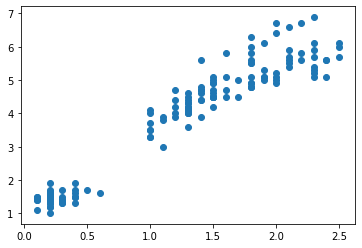

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)
# plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости длины листа $y$ от ширины листа $x$ прямой линией $y = w_0 + w_1 * x$:

$$E(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – длина и ширина листа ириса для $i$-ого объекта в наборе данных.

In [3]:
def square_error(w0, w1):
    l = len(x)
    r=0
    for i in range (l):
        r += (y[i]-(w0+w1*x[i]))**2
    return r/l


Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

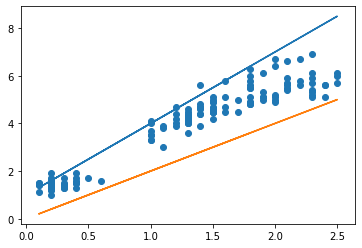

In [4]:
lineFunc = lambda x, w0, w1: w0 + w1 * x
line1 = lineFunc(x,1,3)
line2 = lineFunc(x,0,2)
plt.plot(x,line1,x,line2)
plt.scatter(x,y)
# Code here

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

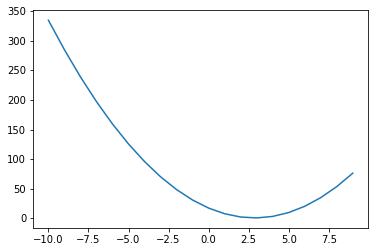

In [5]:
w1 = np.arange(-10,10)
result = np.zeros(20)
for i,e in enumerate(w1):
    result[i] =square_error(0,e)
plt.plot(w1, result)

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

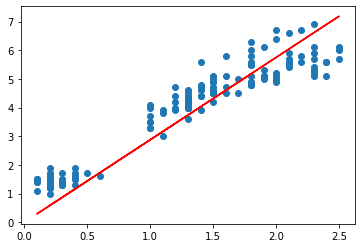

In [6]:
from scipy.optimize import minimize_scalar
qwer = lambda x : square_error(0, x)
a = minimize_scalar(qwer,bounds = [-10,10],method='bounded')
plt.scatter(x, y)
plt.plot(x,lineFunc(x,0,a.x), 'red')

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [7]:
from mpl_toolkits.mplot3d import Axes3D

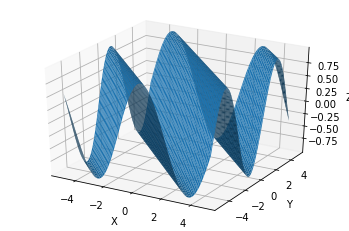

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y)


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

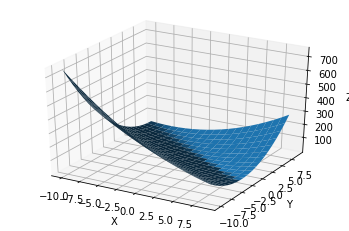

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-10,10, 1)
Y = np.arange(-10,10, 1)
X, Y = np.meshgrid(X, Y)
Z = square_error(X,Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

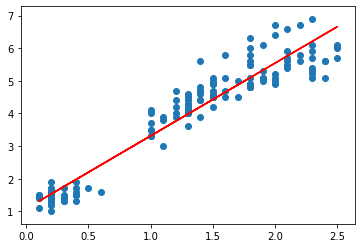

In [10]:
import scipy.optimize as optimize

def func(variable):
    w0, w1 = variable
    return square_error(w0, w1)
lineFunc = lambda x, w0, w1: w0 + w1 * x
minimum = optimize.minimize(func, (0, 0))
w00,w11 = minimum.x
plt.plot(x,lineFunc(x,w00,w11), 'red')
plt.scatter(x,y)

In [11]:
minimum.x

array([1.08355803, 2.22994049])

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

In [12]:
A = np.vstack([x, np.ones(len(x))]).T
T=A.T
result=np.linalg.inv(T.dot(A)).dot(T).dot(y.reshape(len(y), 1))
print(result)

[[2.2299405 ]
 [1.08355803]]
